# 编码器-解码器结构

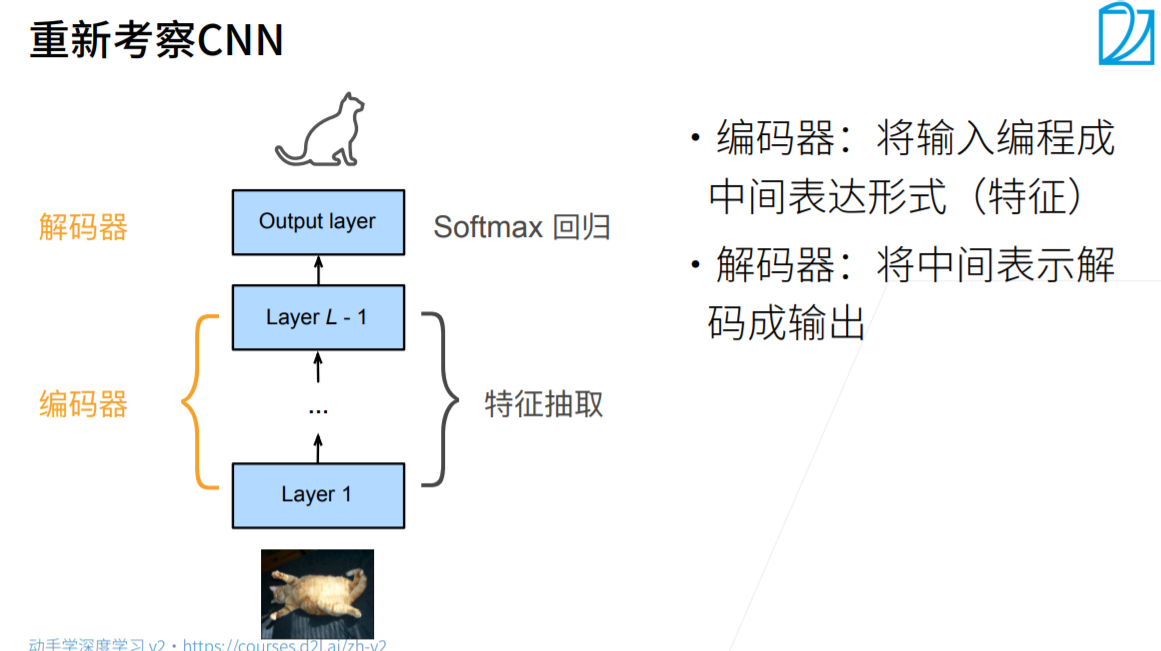
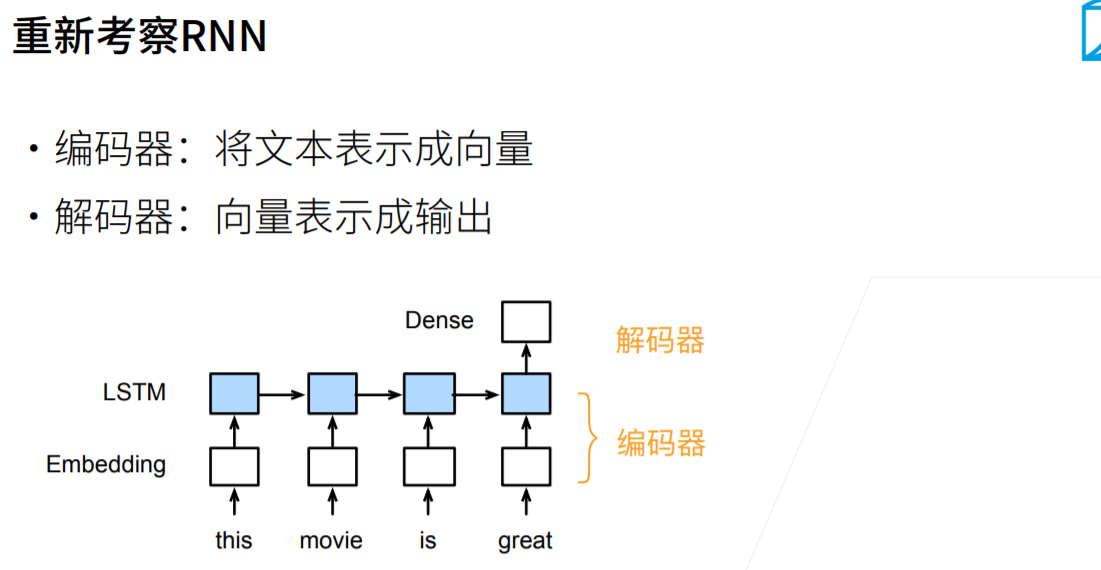
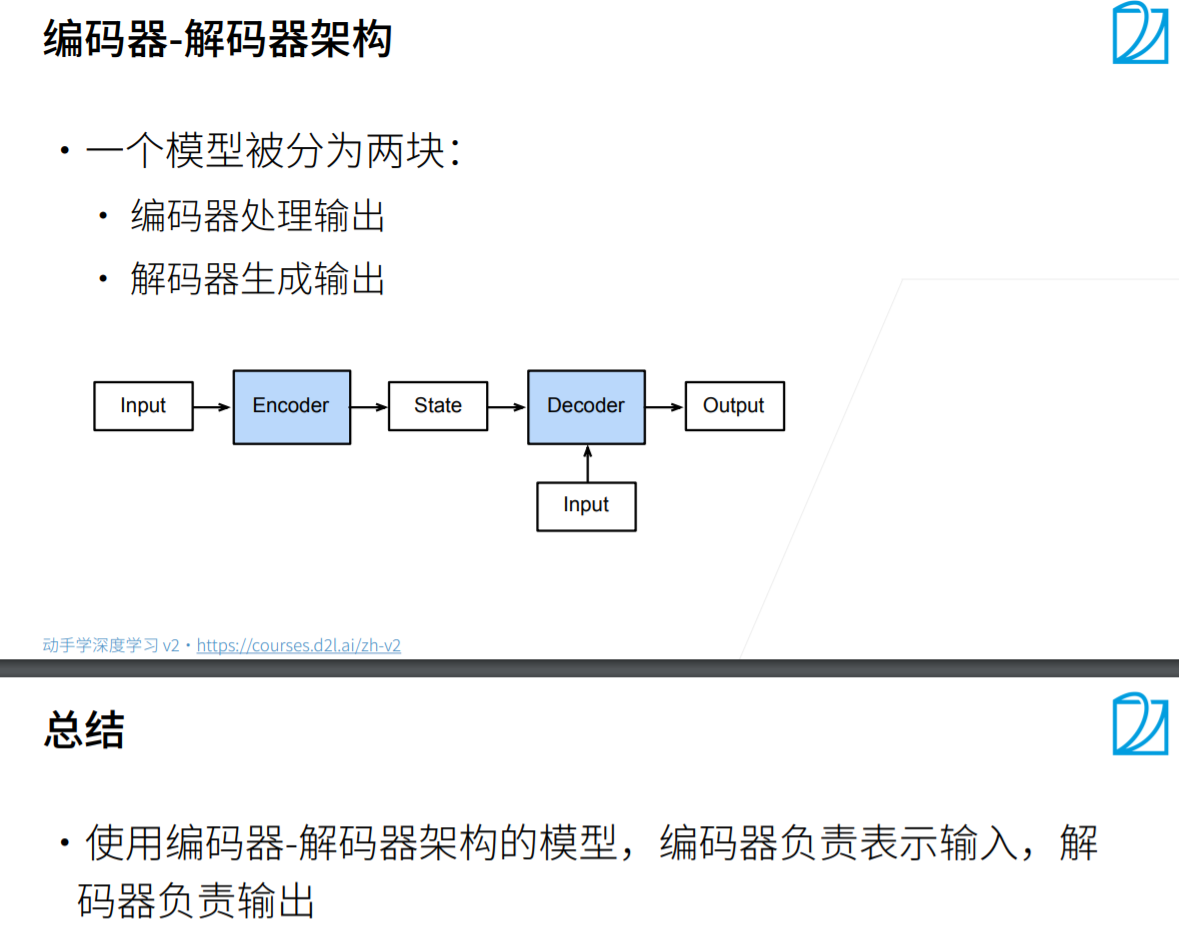

#### （1）编码器：
就是基本的结构，把原始的信息编码成一个中间向量$c$

In [2]:
# 下面两行是防止内核挂掉加的
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from torch import nn

class Encoder(nn.Module):
    """编码器-解码器结构的基本编码器接口。"""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

#### （2）解码器：
把编码器编码成的中间向量$c$，解码成输出的形式

In [4]:
class Decoder(nn.Module):
    """编码器-解码器结构的基本解码器接口。"""
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args): # enc_outputs为编码器的输出（中间向量）
        raise NotImplementedError

    def forward(self, X, state): # 解码器也有自己的输入X,state是自己的隐藏状态
        raise NotImplementedError

#### 合并编码器和解码器

In [7]:
class EncoderDecoder(nn.Module):
    """编码器-解码器结构的基类。"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        """
        enc_X: encoder的输入
        dec_X: decoder的输入
        """
        enc_outputs = self.encoder(enc_X, *args) # enc_outputs为encoder的输出（中间向量）
        dec_state = self.decoder.init_state(enc_outputs, *args) # dec_state为解码器的状态
        return self.decoder(dec_X, dec_state) # 解码器的输出（最终输出）